# **Start**

* **Import**

In [0]:
import sys

import numpy as np
import keras
from keras.models import Model, Sequential
from keras.layers import Input, Dense

Using TensorFlow backend.


* **Google drive**

In [0]:
import os

from google.colab import drive
drive.mount('drive')

!mkdir -p drive -v

cwd = os.getcwd()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at drive


In [0]:
monchemin = 'drive/My Drive/Traitement de la langue/'

dir_path  = os.path.join(cwd, monchemin)
dirs = os.listdir(dir_path)
os.chdir(dir_path)

* **Chemin vers les fichiers**

In [0]:
path_jap = 'UD_Japanese-Modern/'
path_fr = 'UD_French-GSD/'
path_en = 'UD_English-LinES/'
path_nl = 'UD_Dutch-LassySmall/'

print("\nDossier fichiers JAP :")
!ls "$path_jap" | grep ".conllu"
jap_test = "ja_modern-ud-test.conllu"

print("\nDossier fichiers FR :")
!ls "$path_fr" | grep ".conllu"
fr_dev = "fr_gsd-ud-dev.conllu"
fr_test = "fr_gsd-ud-test.conllu"
fr_train = "fr_gsd-ud-train.conllu"

print("\nDossier fichiers EN :")
!ls "$path_en" | grep ".conllu"
en_dev = "en_lines-ud-dev.conllu"
en_test = "en_lines-ud-test.conllu"
en_train = "en_lines-ud-train.conllu"

print("\nDossier fichiers NL :")
!ls "$path_du" | grep ".conllu"
nl_dev = "nl_lassysmall-ud-dev.conllu"
nl_test = "nl_lassysmall-ud-test.conllu"
nl_train = "nl_lassysmall-ud-train.conllu"


Dossier fichiers JAP :
ja_modern-ud-test.conllu

Dossier fichiers FR :
fr_gsd-ud-dev.conllu
fr_gsd-ud-test.conllu
fr_gsd-ud-train.conllu

Dossier fichiers EN :
en_lines-ud-dev.conllu
en_lines-ud-test.conllu
en_lines-ud-train.conllu

Dossier fichiers NL :
ls: cannot access '': No such file or directory


# Tables importantes

* **Table des chemins de tous les fichiers**

In [0]:
liste_file = [
    path_en+en_dev,
    path_en+en_test,
    path_en+en_train,
    path_fr+fr_dev,
    path_fr+fr_test,
    path_fr+fr_train,
    path_nl+nl_dev,
    path_nl+nl_test,
    path_nl+nl_train,
    path_jap+jap_test
]

* **Table pour la lecture des fichiers CoNLL**

In [0]:
mcd =[('INDEX', 'INT'), ('FORM', 'INT'), ('LEMMA', 'INT'), ('POS', 'SYM'), ('X1', 'INT'), ('MORPHO', 'INT'), ('GOV', 'SYM'), ('LABEL', 'SYM'), ('X2', 'SYM'), ('X3', 'SYM')]

* **Table des différentes parties de discours**

In [0]:
POS = {
    "ADJ": 0,
    "ADP": 1,
    "ADV": 2,
    "AUX": 3,
    "CCONJ": 4,
    "DET": 5,
    "INTJ": 6,
    "NOUN": 7,
    "NUM": 8,
    "PART": 9,
    "PRON": 10,
    "PROPN": 11,
    "PUNCT": 12,
    "SCONJ": 13,
    "SYM": 14,
    "VERB": 15,
    "X": 16,
    "ROOT": 17
}


* **Table des différents labels**

In [0]:
LABEL = {
    "acl": 0,
    "acl:relcl": 1,
    "advcl": 2,
    "advcl:cleft": 3,
    "advmod": 4,
    "amod": 5,
    "appos": 6,
    "aux": 7,
    "aux:caus": 8,
    "aux:pass": 9,
    "case": 10,
    "cc": 11,
    "ccomp": 12,
    "compound": 13,
    "compound:prt": 14,
    "conj": 15,
    "cop": 16,
    "csubj": 17,
    "csubj:pass": 18,
    "dep": 19,
    "det": 20,
    "discourse": 21,
    "dislocated": 22,
    "expl": 23,
    "expl:pass": 24,
    "expl:pv": 25,
    "fixed": 26,
    "flat": 27,
    "flat:foreign": 28,
    "flat:name": 29,
    "goeswith": 30,
    "iobj": 31,
    "iobj:agent": 32,
    "mark": 33,
    "nmod": 34,
    "nmod:poss": 35,
    "nmod:range": 36,
    "nsubj": 37,
    "nsubj:caus": 38,
    "nsubj:pass": 39,
    "nummod": 40,
    "obj": 41,
    "obj:agent": 42,
    "obl": 43,
    "obl:agent": 44,
    "obl:arg": 45,
    "obl:mod": 46,
    "orphan": 47,
    "parataxis": 48,
    "punct": 49,
    "reparandum": 50,
    "root": 51,
    "vocative": 52,
    "xcomp": 53
}

# Lecture des fichiers

## **Class Word**

In [0]:
class Word:
  def __init__(self):
    self.featDic = {}

  def getFeat(self, featName):
    if(not featName in self.featDic):
      print('WARNING : feat', featName, 'does not exist')
      return None
    else:
      return self.featDic[featName]

  def setFeat(self, featName, featValue):
    self.featDic[featName] = featValue

  def affiche(self, mcd):
    for elt in mcd:
      feat, status = elt
      print(self.getFeat(feat), '\t', end='')
    print('')

        
  @staticmethod
  def fakeWord(mcd):
    w = Word()
    for elt in mcd:
      feat, status = elt
      w.setFeat(feat, 'ROOT')
    return w

  @staticmethod
  def invalidGov():
    return 123456789

  @staticmethod
  def invalidLabel():
    return ''

## **Class WordBuffer**

In [0]:
class WordBuffer:
  def __init__(self, mcd=None):
    self.currentIndex = 0
    self.array = []
    self.length = 0
    self.mcd = mcd

  def addWord(self, w):
    self.array.append(w)
    self.length += 1

  def affiche(self, mcd):
    for w in self.array:
      w.affiche(mcd)

  def getLength(self):
    return self.length

  def getCurrentIndex(self):
    return self.currentIndex

  def getWord(self, index):
    return self.array[index]

  def getCurrentWord(self):
    return self.getWord(self.currentIndex)

  def nextSentence(self):
    sentence = []
    sentence.append(Word.fakeWord(self.mcd))
    if self.currentIndex == self.length - 1 :
      return False
    while self.currentIndex < self.length :
      sentence.append(self.getCurrentWord())
      if int(self.getCurrentWord().getFeat('EOS')) == 1 :
        self.currentIndex += 1
        return sentence
      else:
        self.currentIndex += 1

  def readFromMcfFile(self, mcfFilename):
    try:
      mcfFile = open(mcfFilename, encoding='utf-8')
    except IOError:
      print(mcfFilename, " : ce fichier n'existe pas")
      exit(1)
    tokens = []
    for ligne in mcfFile:
      tokens = ligne.split("\t")
      w = Word()
      for i in range(0, len(tokens)):
        if(self.mcd[i][0] == 'GOV'):
          w.setFeat(self.mcd[i][0], tokens[i])
          w.setFeat('GOVABS', str(self.length + int(tokens[i]))) # compute absolute index of governor
        else:
          w.setFeat(self.mcd[i][0], tokens[i])
      self.addWord(w)
    mcfFile.close();

  def readFromConlluFile(self, conlluFilename):
    try:
      conlluFile = open(conlluFilename, encoding='utf-8')
    except IOError:
      print(conlluFilename, " : ce fichier n'existe pas")
      exit(1)
    tokens = []
    for ligne in conlluFile:
      if ligne[0] == '\n' :
        self.getWord(self.currentIndex - 1).setFeat('EOS', '1')
        next
      elif ligne[0] == '#' :
        next
      else :
        tokens = ligne.split("\t")
        if '-' not in tokens[0]:
          w = Word()
          for i in range(0, len(tokens)):
            if i == 0 :
              w.setFeat('INDEX', tokens[i])
            if i == 1 :
              w.setFeat('FORM', tokens[i])
            if i == 2 :
              w.setFeat('LEMMA', tokens[i])
            if i == 3 :
              w.setFeat('POS', tokens[i])
            if i == 4 :
              w.setFeat('X1', tokens[i])
            if i == 5 :
              w.setFeat('MORPHO', tokens[i])
            if i == 6 :
              w.setFeat('GOV', tokens[i])
            if i == 7 :
              w.setFeat('LABEL', tokens[i])
            if i == 8 :
              w.setFeat('X2', tokens[i])
            if i == 9 :
              w.setFeat('X3', tokens[i])
          w.setFeat('EOS', '0')
          self.addWord(w)
    conlluFile.close();

  def end(self):
    if(self.getCurrentIndex() >= self.getLength()):
      return True
    else:
      return False

## Class Dico

In [0]:
class Dicos:
  def __init__(self, mcd=False, fileName=False, verbose=False):
    self.content = {}
    self.locked = False
    if mcd :
      for elt in mcd :
        name, status = elt;
        if(status == 'SYM') : 
          self.content[name] = ['NULL', 'ROOT']
    elif fileName :
      try:
        dicoFile = open(fileName, encoding='utf-8')
      except IOError:
        print(fileName, 'does not exist')
        exit(1)
      for ligne in dicoFile:
        if ligne[0] == '#' and ligne[1] == '#' :
          currentDico = ligne[2:-1]
          self.content[currentDico] = []
          if(verbose): 
            print('in module', __name__, 'create dico', currentDico)
        else:
          value = ligne[:-1]
          if not value in self.content[currentDico] :
            self.content[currentDico].append(value)
            if(verbose): 
              print('in module', __name__, 'adding entry', value, 'to', currentDico)
      dicoFile.close()
      self.lock()


  def populateFromMcfFile(self, mcfFilename, mcd, verbose=False):
    try:
      mcfFile = open(mcfFilename, encoding='utf-8')
    except IOError:
      print('cannot open', mcfFilename)
      exit(1)
    tokens = []
    for ligne in mcfFile:
      tokens = ligne.split()
      for i in range(0, len(tokens)):
        if mcd[i][1] == 'SYM' :
          if not tokens[i] in self.content[mcd[i][0]] :
            self.content[mcd[i][0]].append(tokens[i])
            if(verbose): 
              print('in module:', __name__, 'adding value ', tokens[i], 'to dico', mcd[i][0]) 
    mcfFile.close();
    for e in self.content:
      print('DICO', e, ':\t', len(self.content[e]), 'entries')

  def populateFromConlluFile(self, conlluFilename, verbose=False):
    try:
      conlluFile = open(conlluFilename, encoding='utf-8')
    except IOError:
      print('cannot open', conlluFilename)
      exit(1)
    mcd = (('INDEX', 'INT'), ('FORM', 'INT'), ('LEMMA', 'INT'), ('POS', 'SYM'), ('X1', 'INT'), ('MORPHO', 'INT'), ('GOV', 'SYM'), ('LABEL', 'SYM'), ('X2', 'SYM'), ('X3', 'SYM'))
    tokens = []
    for ligne in conlluFile:
      if ligne[0] != '\n' and ligne[0] != '#' :
        tokens = ligne.split("\t")
        for i in range(0, len(tokens)):
          if mcd[i][1] == 'SYM' :
            if not tokens[i] in self.content[mcd[i][0]] :
              self.content[mcd[i][0]].append(tokens[i])
              if(verbose): 
                print('in module:', __name__, 'adding value ', tokens[i], 'to dico', mcd[i][0]) 
    conlluFile.close();
    for e in self.content:
      print('DICO', e, ':\t', len(self.content[e]), 'entries')

  def lock(self):
    self.locked = True
    for key in self.content.keys():
      self.content[key] = tuple(self.content[key])

  def print(self):
    for dico in self.content.keys():
      print(dico, self.content[dico])

  def printToFile(self, filename):
    try:
      dicoFile = open(filename, 'w', encoding='utf-8')
    except IOError:
      print('cannot open', filename)
      exit(1)
    for dico in self.content.keys():
      dicoFile.write('##')
      dicoFile.write(dico)
      dicoFile.write('\n')
      for elt in self.content[dico]:
        dicoFile.write(elt)
        dicoFile.write('\n')
    dicoFile.close()

  def getCode(self, dicoName, symbol, verbose=False) :
    if(verbose) : print('in module ', __name__, 'getCode(', dicoName, ',', symbol, ')')
    if not self.locked :
      print('Dicos must be locked before they can be accessed')
      return False
    if not dicoName in self.content :
      print('no such dico as', dicoName)
      return False
    return self.content[dicoName].index(symbol)

  def getSymbol(self, dicoName, code) :
    if not self.locked :
      print('Dicos must be locked before they can be accessed')
      return False
    if not dicoName in self.content :
      print('no such dico as', dicoName)
      return False
    return self.content[dicoName][code]

  def add(self, dicoName, symbol) :
    if not dicoName in self.content :
      self.content[dicoName] = {symbol}
    else:
      self.content[dicoName].add(symbol)

## Test

* **Word / WordBuffer**

In [0]:
wb = WordBuffer(mcd);
wb.readFromConlluFile(path_fr+fr_dev);


def printSentence(sentence, mcd):
    for i in range(0, len(sentence)):
        sentence[i].affiche(mcd)

        
sentence = wb.nextSentence()
sentence[1].affiche(mcd)
print()
for m in mcd:
  print(sentence[1].getFeat(m[0]), "\t=>\t", m[0])  
print()
printSentence(sentence, mcd)

1 	Aviator 	Aviator 	PROPN 	_ 	_ 	0 	root 	_ 	SpaceAfter=No
 	

1 	=>	 INDEX
Aviator 	=>	 FORM
Aviator 	=>	 LEMMA
PROPN 	=>	 POS
_ 	=>	 X1
_ 	=>	 MORPHO
0 	=>	 GOV
root 	=>	 LABEL
_ 	=>	 X2
SpaceAfter=No
 	=>	 X3

ROOT 	ROOT 	ROOT 	ROOT 	ROOT 	ROOT 	ROOT 	ROOT 	ROOT 	ROOT 	
1 	Aviator 	Aviator 	PROPN 	_ 	_ 	0 	root 	_ 	SpaceAfter=No
 	
2 	, 	, 	PUNCT 	_ 	_ 	1 	punct 	_ 	_
 	
3 	un 	un 	DET 	_ 	Definite=Ind|Gender=Masc|Number=Sing|PronType=Art 	4 	det 	_ 	_
 	
4 	film 	film 	NOUN 	_ 	Gender=Masc|Number=Sing 	1 	appos 	_ 	_
 	
5 	sur 	sur 	ADP 	_ 	_ 	7 	case 	_ 	_
 	
6 	la 	le 	DET 	_ 	Definite=Def|Gender=Fem|Number=Sing|PronType=Art 	7 	det 	_ 	_
 	
7 	vie 	vie 	NOUN 	_ 	Gender=Fem|Number=Sing 	4 	nmod 	_ 	_
 	
8 	de 	de 	ADP 	_ 	_ 	9 	case 	_ 	_
 	
9 	Hughes 	Hughes 	PROPN 	_ 	_ 	7 	nmod 	_ 	SpaceAfter=No
 	
10 	. 	. 	PUNCT 	_ 	_ 	1 	punct 	_ 	_
 	


* **Dico**

In [0]:
print('populating dicos from file ', "UD_French-GSD/fr_gsd-ud-train.conllu")
dicos = Dicos(mcd)
dicos.populateFromConlluFile(path_fr+fr_train, verbose=False)
dicos.lock()
print('saving dicos in file ', sys.argv[2])
dicos.printToFile(sys.argv[2])

populating dicos from file  UD_French-GSD/fr_gsd-ud-train.conllu
DICO POS :	 20 entries
DICO GOV :	 238 entries
DICO LABEL :	 54 entries
DICO X2 :	 3 entries
DICO X3 :	 60 entries
saving dicos in file  /root/.local/share/jupyter/runtime/kernel-593806f2-5323-4009-adef-b8afe5056743.json


* **Tous les labels contenu dans les fichiers**

In [0]:
label = []
for f in liste_file:
  wb = WordBuffer(mcd);
  wb.readFromConlluFile(f);

  X = []
  Y = []
  sentence = wb.nextSentence()
  sentNb = 1
  while sentence :
    for i in range(1, len(sentence)):
      Y.append(sentence[i].getFeat("LABEL"))
    sentNb += 1
    sentence = wb.nextSentence()

  Y = np.asarray(Y)

  nv = []
  [nv.append(item) for item in Y if not item in nv]
  nv = np.asarray(nv)
  print(f,":",nv.shape)
  nv = sorted(nv)
  for i in nv:
    label.append(i)
  
nv = []
[nv.append(item) for item in label if not item in nv]
nv = sorted(nv)
nv = np.asarray(nv)
print(nv.shape)
print(nv)

UD_English-LinES/en_lines-ud-dev.conllu : (37,)
UD_English-LinES/en_lines-ud-test.conllu : (37,)
UD_English-LinES/en_lines-ud-train.conllu : (37,)
UD_French-GSD/fr_gsd-ud-dev.conllu : (46,)
UD_French-GSD/fr_gsd-ud-test.conllu : (43,)
UD_French-GSD/fr_gsd-ud-train.conllu : (51,)
UD_Dutch-LassySmall/nl_lassysmall-ud-dev.conllu : (35,)
UD_Dutch-LassySmall/nl_lassysmall-ud-test.conllu : (35,)
UD_Dutch-LassySmall/nl_lassysmall-ud-train.conllu : (35,)
UD_Japanese-Modern/ja_modern-ud-test.conllu : (21,)
(54,)
['acl' 'acl:relcl' 'advcl' 'advcl:cleft' 'advmod' 'amod' 'appos' 'aux'
 'aux:caus' 'aux:pass' 'case' 'cc' 'ccomp' 'compound' 'compound:prt'
 'conj' 'cop' 'csubj' 'csubj:pass' 'dep' 'det' 'discourse' 'dislocated'
 'expl' 'expl:pass' 'expl:pv' 'fixed' 'flat' 'flat:foreign' 'flat:name'
 'goeswith' 'iobj' 'iobj:agent' 'mark' 'nmod' 'nmod:poss' 'nmod:range'
 'nsubj' 'nsubj:caus' 'nsubj:pass' 'nummod' 'obj' 'obj:agent' 'obl'
 'obl:agent' 'obl:arg' 'obl:mod' 'orphan' 'parataxis' 'punct' 'repara

# Feature

## Transformation

### - LABEL

* **String -> Int**

In [0]:
def lab_str_int(Y):
  tab = len(Y)*[0]
  for i in range(len(Y)):
    tab[i] = LABEL[Y[i]]
  return tab

* **Int -> String**

In [0]:
def lab_int_str(I):
  L = list(LABEL.keys())
  tab = len(I)*[0]
  for i in range(len(I)):
    tab[i] = L[I[i]]
  return tab

### - POS

- **String -> Int**

In [0]:
def pos_str_int(X):
  tab = len(X)*[0]
  for i in range(len(X)):
    tab[i] = POS[X[i]]
  return tab

- **Int -> String**

In [0]:
def pos_int_str(I):
  P = list(POS.keys())
  tab = len(I)*[0]
  for i in range(len(I)):
    tab[i] = P[I[i]]
  return tab

## Differentes features

* **Feature 1**
> $G.0.POS$     ->     retourne la partie de discours du gouverneur     
> $D.0.POS$     ->     retourne la partie de discours du dépendant   
> $DIST$           ->     retourne la distance entre G et D

In [0]:
# Fonction de création de feature
# X : data
# Y : target
def feature1(sentence):
  X = []
  Y = []
  for i in range(1, len(sentence)):
    if sentence[i].getFeat("GOV") == "_":
      break
    d_ind = i                                     # indice du dépendant
    g_ind = int(sentence[d_ind].getFeat("GOV"))   # indice du gouverneur
    label = sentence[d_ind].getFeat("LABEL")      # label de la liaison
    g_pos = sentence[g_ind].getFeat("POS")        # partie de discours du gouverneur
    d_pos = sentence[d_ind].getFeat("POS")        # partie de discours du dépendant
    dist = g_ind - d_ind                          # indice G - indice D
    X.append([g_pos, d_pos, dist])
    Y.append(label)
  return X, Y

* **Feature 2**
> $G.0.POS$                   ->     retourne la partie de discours du gouverneur  
> $G.0.LEMMA$           ->     retourne le lemme du gouverneur  
> $G.0.MORPHO$        ->     retourne la morphologie du gouverneur  
> $D.0.POS$                   ->     retourne la partie de discours du dépendant  
> $D.0.LEMMA$           ->     retourne le lemme du dépendant  
> $D.0.MORPHO$        ->     retourne la morphologie du dépendant  
> $DIST$                          ->     retourne la distance entre G et D  

In [0]:
# Fonction de création de feature
# X : data
# Y : target
def feature2(sentence):
  X = []
  Y = []
  for i in range(1, len(sentence)):
    if sentence[i].getFeat("GOV") == "_":
      break
    d_ind = i                                     # indice du dépendant
    g_ind = int(sentence[d_ind].getFeat("GOV"))   # indice du gouverneur
    label = sentence[d_ind].getFeat("LABEL")      # label de la liaison
    g_pos = sentence[g_ind].getFeat("POS")        # partie de discours du gouverneur
    g_lem = sentence[g_ind].getFeat("LEMMA")      # lemme du gouverneur
    g_mor = sentence[g_ind].getFeat("MORPHO")     # morphologie du gouverneur
    d_pos = sentence[d_ind].getFeat("POS")        # partie de discours du dépendant
    d_lem = sentence[d_ind].getFeat("LEMMA")      # lemme du dépendant
    d_mor = sentence[d_ind].getFeat("MORPHO")     # morphologie du dépendant
    dist = g_ind - d_ind                          # indice G - indice D
    X.append((g_pos, g_lem, g_mor, d_pos, d_lem, d_mor, dist))
    Y.append((label))
  return X, Y

* **Feature 3**
> $G.0.POS$                   ->     retourne la partie de discours du gouverneur  
> $G.0.LEMMA$           ->     retourne le lemme du gouverneur  
> $G.0.MORPHO$        ->     retourne la morphologie du gouverneur  
> $G.-1.POS$                  ->     retourne la partie de discours du mot précédent le gouverneur  
> $G.1.POS$                    ->     retourne la partie de discours du mot suivant le gouverneur  
> $D.0.POS$                   ->     retourne la partie de discours du dépendant  
> $D.0.LEMMA$           ->     retourne le lemme du dépendant  
> $D.0.MORPHO$        ->     retourne la morphologie du dépendant  
> $D.-1.POS$                  ->     retourne la partie de discours du mot précédent le dépendant  
> $D.1.POS$                    ->     retourne la partie de discours du mot suivant le dépendant  
> $DIST$                          ->     retourne la distance entre G et D  

In [0]:
# Fonction de création de feature
# X : data
# Y : target
def feature3(sentence):
  X = []
  Y = []
  size = len(sentence)
  for i in range(1, size):
    if sentence[i].getFeat("GOV") == "_":
      break
    d_ind = i                                     # indice du dépendant
    g_ind = int(sentence[d_ind].getFeat("GOV"))   # indice du gouverneur
    label = sentence[d_ind].getFeat("LABEL")      # label de la liaison
    g_pos = sentence[g_ind].getFeat("POS")        # partie de discours du gouverneur
    g_lem = sentence[g_ind].getFeat("LEMMA")      # lemme du gouverneur
    g_mor = sentence[g_ind].getFeat("MORPHO")     # morphologie du gouverneur
      # partie de discours du mot avant G
    g_min = sentence[g_ind-1].getFeat("POS") if ((g_ind-1) >= 0) else '_'
      # partie de discours du mot après G
    g_add = sentence[g_ind+1].getFeat("POS") if ((g_ind+1) < size) else '_'  
    d_pos = sentence[d_ind].getFeat("POS")        # partie de discours du dépendant
    d_lem = sentence[d_ind].getFeat("LEMMA")      # lemme du dépendant
    d_mor = sentence[d_ind].getFeat("MORPHO")     # morphologie du dépendant
      # partie de discours du mot avant D
    d_min = sentence[d_ind-1].getFeat("POS") if ((d_ind-1) >= 0) else '_'
      # partie de discours du mot après D
    d_add = sentence[d_ind+1].getFeat("POS") if ((d_ind+1) < size) else '_'
    dist = g_ind - d_ind                          # indice G - indice D
    X.append((g_pos, g_lem, g_mor, g_min, g_add, d_pos, d_lem, d_mor, d_min, d_add, dist))
    Y.append((label))
  return X, Y

## Construction

* **feature 1**

In [0]:
# Constuction de la feature 1 sur le fichier 'path'
# X : entrée pour l'apprentissage
# Y : sortie pour l'apprentissage en one_hot

def construct_feature_1(path_file):
  wb = WordBuffer(mcd);
  wb.readFromConlluFile(path_file);

  X = []
  Y = []
  sentence = wb.nextSentence()
  sentNb = 1
  while sentence :
    x, y = feature1(sentence)
    for s in x:
      X.append(s)
    for s in y:
      Y.append(s)
    sentNb += 1
    sentence = wb.nextSentence()

  X = np.asarray(X)
  Y = np.asarray(Y)
  
  x1 = X.T[0]
  x2 = X.T[1]
  x3 = X.T[2]
  x1 = np.asarray(pos_str_int(x1))
  x2 = np.asarray(pos_str_int(x2))
  X = np.asarray([x1,x2,x3]).T
  
  Y = np.asarray(lab_str_int(Y))
  Y = keras.utils.to_categorical(Y, num_classes=54)
  
  return X, Y

* **feature 2**

In [0]:
# Constuction de la feature 2 sur le fichier 'path'
# X : entrée pour l'apprentissage
# Y : sortie pour l'apprentissage

def construct_feature_2(path_file):
  wb = WordBuffer(mcd);
  wb.readFromConlluFile(path_file);

  X = []
  Y = []
  sentence = wb.nextSentence()
  sentNb = 1
  while sentence :
    x, y = feature1(sentence)
    for s in x:
      X.append(s)
    for s in y:
      Y.append(s)
    sentNb += 1
    sentence = wb.nextSentence()

  X = np.asarray(X)
  Y = np.asarray(Y)

  # Pas fini
  
  return X, Y

* **feature 3**

In [0]:
# Constuction de la feature 3 sur le fichier 'path'
# X : entrée pour l'apprentissage
# Y : sortie pour l'apprentissage

def construct_feature_3(path_file):
  wb = WordBuffer(mcd);
  wb.readFromConlluFile(path_file);

  X = []
  Y = []
  sentence = wb.nextSentence()
  sentNb = 1
  while sentence :
    x, y = feature1(sentence)
    for s in x:
      X.append(s)
    for s in y:
      Y.append(s)
    sentNb += 1
    sentence = wb.nextSentence()

  X = np.asarray(X)
  Y = np.asarray(Y)

  # Pas fini
  
  return X, Y

# **Apprentissage**

In [0]:
def create_model():
  model = Sequential()
  model.add(Dense(50, input_dim=3, activation='relu'))
  model.add(Dense(54, activation = "softmax"))
  model.compile(optimizer="Adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])
  return model

X, Y = construct_feature_1(path_fr + fr_train)
m = create_model()
m.fit(X, Y)
m.summary()

Epoch 1/1
356638/356638 [==============================] - 15s 43us/step - loss: 0.0272 - acc: 0.9908
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                200       
_________________________________________________________________
dense_6 (Dense)              (None, 54)                2754      
Total params: 2,954
Trainable params: 2,954
Non-trainable params: 0
_________________________________________________________________


# Algorithme C.L.E.

* **Cycle**

In [0]:
# Fonction qui permet de voir si il y a un cycle
# Param :
#     tab -> Le 'graphe' à tester
#     i -> Le nombre de sommets définis
def contain_cycle(tab, I, size):
  C = []
  
  for i in I:
    verif = [False]*size
    verif[i] = True
    t = tab[i]
    while (tab[t] != -1) == True:
      C.append(t)
      if verif[t] == True:
        t = -1
        return C, True
      verif[t] = True
      t = tab[t]
  
  
  return C, False

In [1]:
!pip install networkx

In [0]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [0]:
ROOT = 'Root'

def find_bestInEdge(G, v):
  maxW = float('-inf')
  bestInEdge = None
  for e in G.in_edges(v, keys=True, data=True):
    weight = e[3]['weight']
    if(weight > maxW):
      maxW = weight
      bestInEdge = e
  return bestInEdge

def node_generator():
  i = 0
  while(True):
    n = 'C%d' % (i)
    yield n
    i+=1

def contract(G, C, KO, CN):

  ### 1. On récupère les sommets du cycle
  L = []
  C_nokey = []
  D = {}#stocke la data associé à l'arc entrant d'un sommet du cycle : D[v] : la data du sommet entrant dans v
  for u, v, k in C:
    L.append(u)
    L.append(v)
    C_nokey.append((u,v))
    data = G[u][v][k]
    D[v] = data
  L = list(set(L))
  #print(L)
  #print(D)
  #dict sommet qui prends l'entrée value, poid de l'entrée

  ### 2. On copie G, on ajoute un sommet avec un nom obtenu par gen ie : C1, C2, ...
  H = G.copy()
  N = next(CN)
  H.add_node(N)  
  ### 3. Avant de supprimer chacun des sommets du cycle, on récupère ses arcs, on modifie les poids et on les relie sur le nouveau sommet
  for v in L:
    #On supprime v du nouveau graphe
    H.remove_node(v)
    #On récupère les arcs entrant dans v
    for u, _, k, data in G.in_edges(v, keys=True, data=True): # v == vv
      if((u, v, k) not in set(C) and u not in L):#u not in L suffisant ???
        newW = data['weight'] - D[v]['weight']
        H.add_edge(u, N, weight=newW, id=data['id'])
        KO[data['id']].append(D[v]['id']) #l'id de u->v kick l'id de l'ex meilleur arc u->v    
    
    #arcs sortants
    for _, u, k, data in G.out_edges(v, keys=True, data=True):
      if((v, u, k) not in set(C) and u not in L):
        H.add_edge(N, u, weight=data['weight'], id=data['id'])
  
  return H

def expand(subBIE, bIE, G, KO):
  H = nx.MultiDiGraph()
  
  E = bIE.edges(data=True)
  Locked = []

  for _, _, data in subBIE.edges(data=True):
    #on conserve l'id des arêtes à ajouter à l'arbre
    Locked.append(data['id'])
    
    #KicksOut supprime des arêtes
    for i in KO[data['id']]:
      #i est l'id d'une arête à ne pas ajouter/supprimer
      E = [x for x in E if x[2]['id'] != i]
  
  #poser la la condition de doublon dans le cas de récursivité trop profonde ?
  
  #Ajout des arêtes
  for u, v, data in G.edges(data=True):
    if data['id'] in Locked:
      H.add_edge(u, v, weight=data['weight'], id=data['id'])

  for u, v, data in E:
    if not H.has_edge(u, v):
      H.add_edge(u, v, weight=data['weight'], id=data['id'])
  
  return H

#def maxSpanningTree()
def maxSpanningTree(G, root, KicksOut, CN):
  bIE = nx.MultiDiGraph()
  bIE.add_nodes_from(G.nodes)
  for v in G.nodes:
    if(v != root):
      #On ajoute l'arc dans le spanning tree
      e = find_bestInEdge(G, v)
      if(e != None):#inutile mais au cas où
        
        bIE.add_edge(e[0], e[1], e[2], weight=e[3]['weight'], id=e[3]['id'])
        
        try:
          C = nx.find_cycle(bIE)

          G_prime = contract(G, C, KicksOut, CN)
          #print for debug
          #print('bIE : ', bIE.edges(data=True))
          #print('C : ', C)
          #print('G : ', G.edges(data=True))
          #print('G_prime : ', G_prime.edges(data=True))
          #print('G_prime :', G_prime.nodes)
          #nx.draw(G_prime, with_labels=True)
          #plt.axis('off')
          #plt.show()
          
          subBIE = maxSpanningTree(G_prime, root, KicksOut, CN)
          
          return expand(subBIE, bIE, G, KicksOut)

        except nx.NetworkXNoCycle:
          pass
  #Un arbre a pu être créer de manière gloutonnne
  return bIE

def CLE(G, root):
  contract_node = node_generator()
  KicksOut = {}
  for i in range(G.number_of_edges()):
    KicksOut[i] = []
  return maxSpanningTree(G, root, KicksOut, contract_node)

In [0]:
def ids():
  i = 0
  while(True):
    yield i
    i+=1

def gen_test_graph():
  G = nx.MultiDiGraph()
  gen = ids()
  G.add_nodes_from([ROOT, 'V1', 'V2', 'V3'])
  G.add_edge(ROOT, 'V1', weight=5, id=next(gen))#a
  G.add_edge(ROOT, 'V2', weight=1, id=next(gen))#b
  G.add_edge(ROOT, 'V3', weight=1, id=next(gen))#c
  G.add_edge('V1', 'V2', weight=11, id=next(gen))#d
  G.add_edge('V1', 'V3', weight=4, id=next(gen))#e
  G.add_edge('V2', 'V3', weight=5, id=next(gen))#f
  G.add_edge('V2', 'V1', weight=10, id=next(gen))#g
  G.add_edge('V3', 'V1', weight=9, id=next(gen))#h
  G.add_edge('V3', 'V2', weight=8, id=next(gen))#i
  return G

def gen_test_exam():
  G = nx.MultiDiGraph()
  gen = ids()
  G.add_nodes_from([ROOT, "route", "sur", "la"])
  G.add_edge(ROOT, "sur", weight=-2, id=next(gen))
  G.add_edge(ROOT, "route", weight=1, id=next(gen))
  G.add_edge('route', "la", weight=1, id=next(gen))
  G.add_edge('route', "sur", weight=2, id=next(gen))
  G.add_edge('sur', "route", weight=2, id=next(gen))
  return G

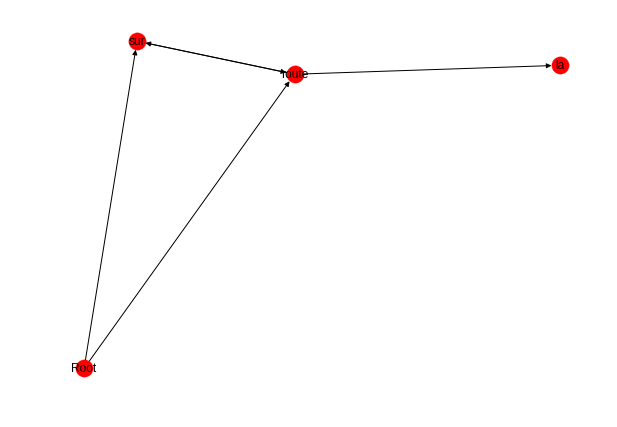

In [100]:
#G_test = gen_test_graph()
G_test = gen_test_exam()
nx.draw(G_test, with_labels=True)

In [0]:
Tree = CLE(G_test, ROOT)

[('Root', 'route', {'weight': 1, 'id': 1}), ('route', 'la', {'weight': 1, 'id': 2}), ('route', 'sur', {'weight': 2, 'id': 3})]


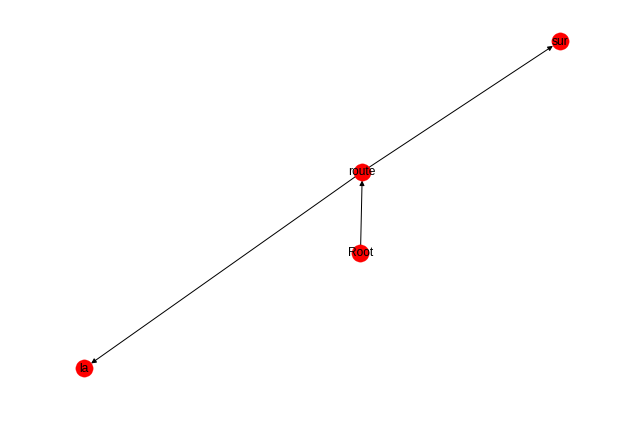

In [102]:
nx.draw(Tree, with_labels=True)

print(Tree.edges(data=True))

In [72]:
a= []
a.append((5,6))
a.append((4,3))
a

[(5, 6), (4, 3)]

* **Chu Liu Edmonds**

In [0]:
G = np.asarray([
   [0, 5, 1, 1],
   [0, 0,11, 4],
   [0,10, 0, 5],
   [0, 9, 8, 0]
])

def CLE(Graph, root):
  I = []
  MAE = G.shape[0]*[-1]
  for i in range(1, G.shape[0]):
    MAE[i] = np.argmax(G[i])
    I.append(i)
    C, boolean = contain_cycle(MAE, I, G.shape[0])
    if boolean == True:
      print("cycle avec i =", i, "et", C)
      break
  return np.asarray(MAE)
  
  
tab = CLE(G, 0)
print(tab)

m = np.argmax(G, axis=1)
print(m)

cycle avec i = 2 et [2, 1]
[-1  2  1 -1]
[1 2 1 1]
